# Creating a Supervised Model to predict Life Expectency


## Loading data and preliminary analysis



In [1]:
import numpy as np #importing the numpy library
import pandas as pd #importing the pandas library
LE=pd.read_csv('supervised.csv') #loading the datas set for our analysis

In [2]:
LE

,Country,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_Expectancy
0,Afghanistan,Developing,263,62,71.279624,65,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,74,0,364.975229,99,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,Developing,19,21,0.000000,95,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,0.000000,64,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,0.000000,94,0,62.8,9,93,94,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Uruguay,Developing,116,0,0.000000,95,0,64.0,0,95,95,0.1,15524.842470,3431552.0,1.5,1.4,0.794,15.5,77.0
126,Uzbekistan,Developing,184,15,0.000000,99,22,44.7,17,99,99,0.1,2137.576852,312989.0,3.0,3.1,0.697,12.1,69.4
127,Vanuatu,Developing,13,0,0.000000,64,39,53.3,0,65,64,0.1,285.834140,26463.0,1.5,1.4,0.598,10.8,72.0
128,Zambia,Developing,33,27,0.000000,9,9,23.4,40,9,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,61.8


In [3]:
LE.info() #showing all the information about the variables in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          130 non-null    object 
 1   Status                           130 non-null    object 
 2   Adult Mortality                  130 non-null    int64  
 3   infant deaths                    130 non-null    int64  
 4   percentage expenditure           130 non-null    float64
 5   Hepatitis B                      130 non-null    int64  
 6   Measles                          130 non-null    int64  
 7   BMI                              130 non-null    float64
 8   under-five deaths                130 non-null    int64  
 9   Polio                            130 non-null    int64  
 10  Diphtheria                       130 non-null    int64  
 11  HIV/AIDS                         130 non-null    float64
 12  GDP                   

In [4]:
LE.drop(['Country', 'Status'], axis = 1, inplace = True) # removing country and status variables since they are object data type and wont be useful for us in creating the model
LE

,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_Expectancy
0,263,62,71.279624,65,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,74,0,364.975229,99,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,19,21,0.000000,95,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,335,66,0.000000,64,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,116,8,0.000000,94,0,62.8,9,93,94,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,116,0,0.000000,95,0,64.0,0,95,95,0.1,15524.842470,3431552.0,1.5,1.4,0.794,15.5,77.0
126,184,15,0.000000,99,22,44.7,17,99,99,0.1,2137.576852,312989.0,3.0,3.1,0.697,12.1,69.4
127,13,0,0.000000,64,39,53.3,0,65,64,0.1,285.834140,26463.0,1.5,1.4,0.598,10.8,72.0
128,33,27,0.000000,9,9,23.4,40,9,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,61.8


### Checking the target

Here the target attribute is `Life_Expectancy`, which is the dependent variable. So We are setting it to another data frame for targets.

In [5]:
target = pd.DataFrame(LE,columns=['Life_Expectancy']) # just getting the target variable from the dataset
print(target)

     Life_Expectancy
0               65.0
1               77.8
2               75.6
3               52.4
4               76.3
..               ...
125             77.0
126             69.4
127             72.0
128             61.8
129             67.0

[130 rows x 1 columns]


The supervised model we'll be making is going be a regression task. Since, our model is going to predict the Life Expectency and regression is better for prediction.

<AxesSubplot:xlabel='Life_Expectancy', ylabel='count'>

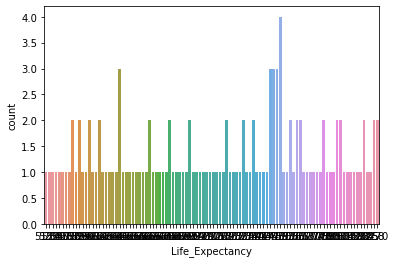

In [6]:
import seaborn as sb # importing the seaborn library for ploting
sb.countplot(x=target["Life_Expectancy"]) #making a fequency plot for the target varibale life expectency

Here we can see the frequency distributation of the variable Life Expectency. We can see that there are multiple values which was counted more than once.

### Checking the features 

I have removed the Life expectency since its our target variable and I have also removed the percentage expenditure as most of its value is zero. I'll be using the rest of the variables as my features. They are as shown below:

In [7]:
LE.drop(['Life_Expectancy','percentage expenditure'], axis = 1, inplace = True)
features=LE
print(features)

     Adult Mortality  infant deaths  Hepatitis B  Measles   BMI  \
0                263             62           65     1154  19.1   
1                 74              0           99        0  58.0   
2                 19             21           95       63  59.5   
3                335             66           64      118  23.3   
4                116              8           94        0  62.8   
..               ...            ...          ...      ...   ...   
125              116              0           95        0  64.0   
126              184             15           99       22  44.7   
127               13              0           64       39  53.3   
128               33             27            9        9  23.4   
129              336             22           87        0  31.8   

     under-five deaths  Polio  Diphtheria  HIV/AIDS           GDP  Population  \
0                   83      6          65       0.1    584.259210  33736494.0   
1                    0     99    

The shape of the features is shown below. It has 130 rows and 15 columns

In [8]:
features.shape #showing the shape of features

(130, 15)

In [9]:
features.describe() # finding out the std and mean of the variables

,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000
mean,158.676923,27.723077,80.653846,1773.315385,40.533077,36.761538,81.123077,82.846154,0.785385,5997.928670,1.163121e+07,4.680769,4.780769,0.674792,12.746923
std,99.484969,96.426702,24.992933,9130.704172,21.196345,123.951904,25.435133,23.289370,1.520206,10101.952401,3.017667e+07,4.380632,4.477144,0.151216,2.760159
min,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,5.400000
25%,79.000000,0.000000,77.250000,0.000000,23.325000,1.000000,78.250000,78.000000,0.100000,702.333884,2.423205e+05,1.525000,1.550000,0.550500,10.800000
50%,145.500000,3.000000,91.000000,16.500000,41.300000,3.000000,91.500000,92.500000,0.100000,2231.867706,1.894576e+06,3.400000,3.450000,0.701500,12.750000
75%,215.000000,20.500000,96.000000,210.500000,61.200000,25.500000,97.000000,97.000000,0.500000,6311.780768,1.095208e+07,6.500000,6.575000,0.784000,14.675000
max,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,56554.387600,2.581621e+08,26.700000,27.300000,0.937000,20.400000


We can see that data of features is not standardised. In fact, the mean and standard deviation of each variable is not 0 and 1, respectively. The mean and standard deviation have to be close to 0 and 1, respectively for it to be standardised

## Training and testing a machine learning pipeline


In [10]:
from sklearn.model_selection import KFold # importing kfold for kfold validation
from sklearn.model_selection import train_test_split # importing library for training and testing splits
from sklearn.preprocessing import StandardScaler # Library to standardise data
from sklearn.linear_model import LinearRegression # Library to use OLS Regression
from sklearn.preprocessing import PolynomialFeatures # Library to generate polynomial features
from sklearn.pipeline import Pipeline # Library to create a pipeline
from sklearn.linear_model import Lasso #importing the library for lasso regression

In [11]:
kf = KFold(n_splits = 5, shuffle=True, random_state=5) #using the kfold to split the data
kf.get_n_splits(features)

5

In [12]:
R2_train = []
R2_test = []

for train_index, test_index in kf.split(features):
    features_train, features_test = features.iloc[train_index,:], features.iloc[test_index,:]
    target_train, target_test = target.iloc[train_index,:], target.iloc[test_index, :]
    
    # making the pipeline
    pipe_deg1 = Pipeline([('scaler', StandardScaler()), # standardising the data set
                          ('lm', LinearRegression())]) # training linear regression model    
    
    
    pipe_deg1.fit(features_train, target_train)
    
    #calculating the accuracy of the model
    R2_train.append( pipe_deg1.score(features_train, target_train) )
    R2_test.append( pipe_deg1.score(features_test, target_test) )

R2_train_mean = round(np.mean(R2_train), 2)
R2_test_mean = round(np.mean(R2_test), 2)

print("Mean R2 on train:", R2_train_mean )
print("Mean R2 on test:", R2_test_mean )

Mean R2 on train: 0.9
Mean R2 on test: 0.82


The accuracy of the model is very good as both the values for  train and test data are high. So they are not over or underfitting the data.

In [13]:
R2_train = []
R2_test = []

for train_index, test_index in kf.split(features):
    features_train, features_test = features.iloc[train_index,:], features.iloc[test_index,:]
    target_train, target_test = target.iloc[train_index,:], target.iloc[test_index, :]
    
    # making the pipeline
    pipe_deg2 = Pipeline([('scaler', StandardScaler()), # standardising the data set
                          ('poly', PolynomialFeatures(2)), # adding polynomial degree of 2
                          ('lm', LinearRegression())]) # training linear regression model    
    
    
    pipe_deg2.fit(features_train, target_train)
    
    #calculating the accuracy of the model
    R2_train.append( pipe_deg2.score(features_train, target_train) )
    R2_test.append( pipe_deg2.score(features_test, target_test) )

R2_train_mean = round(np.mean(R2_train), 2)
R2_test_mean = round(np.mean(R2_test), 2)

print("Mean R2 on train:", R2_train_mean )
print("Mean R2 on test:", R2_test_mean )

Mean R2 on train: 1.0
Mean R2 on test: -231.43


The model associated with polynomial transformation of the feature space, with a degree equal to 2 greatly overfits.
So, we can say polynomial transformation of the feature space, with a degree equal to 1 is the bestfit here.

Now to check bias-variance trade-off of the model and wheather the assumptions of the regression models are verified. The points are:
- normality of residuals
- independence of residuals
- no multicollinearity of predictors

In [14]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=10, shuffle=True)
pipe_deg1.fit(features_train, target_train)

test = pd.DataFrame({'actual': target_test.Life_Expectancy.values,
                     'fitted': pipe_deg1.predict(features_test).squeeze()})
test["residuals"] = test.actual - test.fitted
test.describe()

,actual,fitted,residuals
count,43.000000,43.000000,43.000000
mean,70.423256,71.750036,-1.326781
std,7.913997,7.163805,3.777638
min,52.400000,53.690423,-13.104370
25%,66.200000,68.095286,-1.986768
50%,72.300000,72.261717,-0.579176
75%,75.550000,76.096459,1.146377
max,82.700000,84.218440,4.516498


We now have the residual values

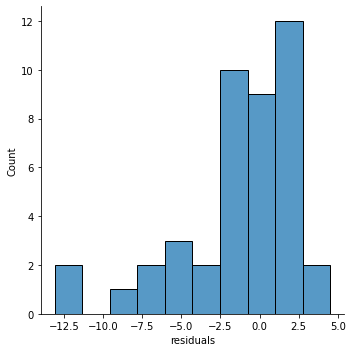

In [15]:
#plotting residuals frequency
sb.displot(test, x="residuals")

Residuals are roughly normally distributed, it's distributed a bit more on the left but it is not that much. So, we can say one of the requirements of residuals is met.

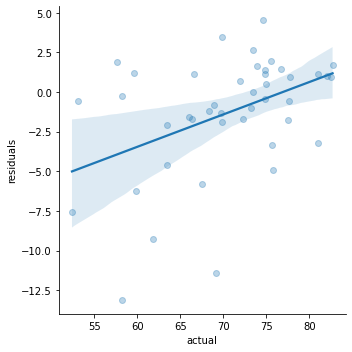

In [16]:
#checking correlation with actual values

sb.lmplot(data=test, x="actual", y="residuals", scatter_kws={'alpha':0.3})

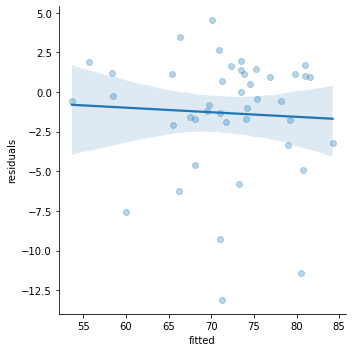

In [17]:
#checking correlation with fitted values
sb.lmplot(data=test, x="fitted", y="residuals", scatter_kws={'alpha':0.3})

Here we can see that all the residuals are scattered accross the plot. There are hardly any correlations with actual and fitted values. This means This condition is also met.

In [18]:
features_train.corr()

,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Adult Mortality,1.000000,0.143931,-0.160614,0.021317,-0.331045,0.166327,-0.374521,-0.343999,0.730560,-0.376865,0.128629,0.270451,0.277910,-0.644210,-0.515212
infant deaths,0.143931,1.000000,-0.073823,0.872929,-0.206235,0.993667,-0.102062,-0.128996,0.067264,-0.117313,0.370364,0.591171,0.596907,-0.171189,-0.171590
Hepatitis B,-0.160614,-0.073823,1.000000,0.033276,0.144420,-0.095308,0.380872,0.789774,-0.211622,0.035982,-0.141948,-0.024802,-0.110386,0.200897,0.219987
Measles,0.021317,0.872929,0.033276,1.000000,-0.145767,0.831230,0.008680,0.005511,-0.045962,-0.095634,0.051936,0.479144,0.473870,-0.075200,-0.081593
BMI,-0.331045,-0.206235,0.144420,-0.145767,1.000000,-0.214550,0.155202,0.171927,-0.223655,0.436488,-0.025769,-0.492431,-0.500225,0.607071,0.609862
under-five deaths,0.166327,0.993667,-0.095308,0.831230,-0.214550,1.000000,-0.126055,-0.156194,0.092107,-0.121918,0.454878,0.576440,0.581058,-0.192155,-0.191851
Polio,-0.374521,-0.102062,0.380872,0.008680,0.155202,-0.126055,1.000000,0.506502,-0.316148,0.233798,-0.208999,-0.304945,-0.310099,0.485044,0.393011
Diphtheria,-0.343999,-0.128996,0.789774,0.005511,0.171927,-0.156194,0.506502,1.000000,-0.315409,0.205038,-0.176444,-0.085830,-0.185545,0.401879,0.359497
HIV/AIDS,0.730560,0.067264,-0.211622,-0.045962,-0.223655,0.092107,-0.316148,-0.315409,1.000000,-0.199084,0.115407,0.155327,0.141971,-0.463622,-0.374799
GDP,-0.376865,-0.117313,0.035982,-0.095634,0.436488,-0.121918,0.233798,0.205038,-0.199084,1.000000,0.050579,-0.305948,-0.306764,0.607501,0.619116


<AxesSubplot:>

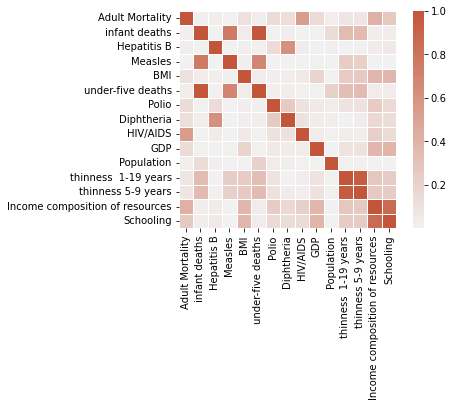

In [19]:
cmap = sb.diverging_palette(240, 20, as_cmap=True)

sb.heatmap(features_train.corr()**2, cmap=cmap, center=0, square=True, linewidths=.5)

We can see that some features are correlated. Our model cannot be used for hypothesis testing as there is multicollinearity of the predictors. But We only need it for predictions so we can use this model.

We will now apply the lasso model on our polynominal model to get a better accuracy of the data.

## Tuning the proposed machine learning pipeline 

In [20]:
features_tuning, features_val, target_tuning, target_val = train_test_split(features, target, test_size=0.33, random_state=1, shuffle=True)

kf = KFold(n_splits = 5, shuffle=True, random_state=10)
kf.get_n_splits(features_tuning)

5

In [21]:
R2s_train = [] # Empty array 
R2s_test = [] # Empty array 
alphas = np.logspace(-4, 1, 100) # Creates an arrays of alphas

# Trying all alphas
for a in alphas:
    R2_train = [] # Empty array
    R2_test = [] # Empty array
    
    # Standardising outcome data
    scaler = StandardScaler()
    scaler.fit(target_train)
    target_train = scaler.transform(target_train) 
    target_test = scaler.transform(target_test)

    # For each alpha, perform k-fold cross validation
    for train_index, test_index in kf.split(features_tuning):
        features_train, features_test = features_tuning.iloc[train_index], features_tuning.iloc[test_index]
        target_train, target_test = target_tuning.iloc[train_index], target_tuning.iloc[test_index]
    
        # Pipeline on feature data
        pipe = Pipeline([('scaler', StandardScaler()), # scaling feature data
                         ('poly', PolynomialFeatures(2)), # polynomial features
                         ('lm', Lasso(alpha = a, tol=1e-1))]) # training a Lasso regression model    
    
        # Fitting our pipeline on train data
        pipe.fit(features_train, target_train)
        
        # Updating the vector of accuracies for a single fold
        R2_train.append( pipe.score(features_train, target_train) )
        R2_test.append( pipe.score(features_test, target_test) )

    # Updating the vector of accuracies for a specific alpha value
    R2s_train.append( np.mean(R2_train) )
    R2s_test.append( np.mean(R2_test) )

Finding the accuracies if the dataframe with different α values.

In [22]:
accuracies = pd.DataFrame({"alpha": alphas,
                           "R2_train": R2s_train,
                           "R2_test": R2s_test})
accuracies.head()

,alpha,R2_train,R2_test
0,0.000100,0.960115,-1.148462
1,0.000112,0.960115,-1.148188
2,0.000126,0.960114,-1.147881
3,0.000142,0.960114,-1.147535
4,0.000159,0.960114,-1.147147


Showing a plot how the change of accuracy occurs on the train and test data with the changes of α values(Lasso penalty term).

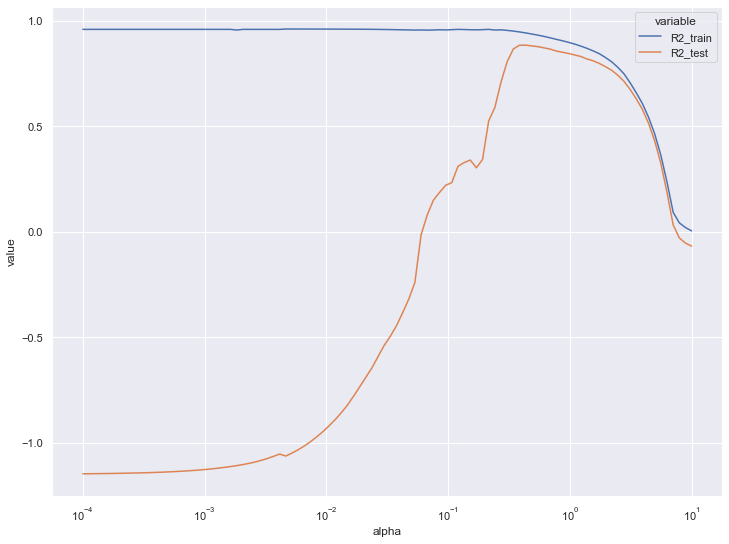

In [23]:
sb.set(rc={'figure.figsize':(12,9)})
plot = sb.lineplot(data = pd.melt(accuracies, id_vars=['alpha'], value_vars=['R2_train', 'R2_test']),
                   x="alpha", y="value", hue="variable")
plot.set_xscale('log')

The following conclusions can be draft from the above chart:

For small values of α the model becomes overfit with high variance.

For high values of α the model becomes undefit with high bias.

For a value of  α around  10^-1 the model seems to show the best bias-variance trade-off.

In [24]:
tunedAlpha = alphas[np.argmax(R2s_test)] # finding the most accurate alpha value
print("tuned alpha:", tunedAlpha) 

tuned alpha: 0.4328761281083057


Now we'll use our tuned alpha value to calculate our model's accuracy.

In [25]:
# Building a pipeline
pipe = Pipeline([('scaler', StandardScaler()), # scaling features
                 ('poly', PolynomialFeatures(2)), # polynomial features
                 ('lm', Lasso(alpha = tunedAlpha, tol=1e-1))]) # training a linear regression model 

pipe.fit(features_tuning, target_tuning)

target_tuning_pred = pipe.predict(features_tuning)
target_val_pred = pipe.predict(features_val)

# Accuracy scores

R2_tuning = pipe.score(features_tuning, target_tuning) 
R2_val = pipe.score(features_val, target_val)


print("R2 on tuning data:", R2_tuning)
print("R2 on validation data:", R2_val)

R2 on tuning data: 0.9400141145900569
R2 on validation data: 0.8330824866916686


We can see that from before our accuracy is a bit better as it has incresed from 0.82 to 0.83. Which of course can be said as an improved prediction

Now to check bias-variance trade-off of the model and wheather the assumptions of the regression models are verified again for this model.

In [26]:
validation = pd.DataFrame({"actual": target_val.Life_Expectancy.values, "fitted": target_val_pred})
validation["residuals"] = validation.actual - validation.fitted
validation.describe()

,actual,fitted,residuals
count,43.000000,43.000000,43.000000
mean,71.351163,71.436242,-0.085079
std,7.599792,7.226749,3.103743
min,53.700000,51.750026,-9.382744
25%,67.250000,67.705732,-1.729644
50%,73.200000,72.770422,-0.089094
75%,75.300000,75.749615,1.650514
max,85.000000,82.533023,6.747675


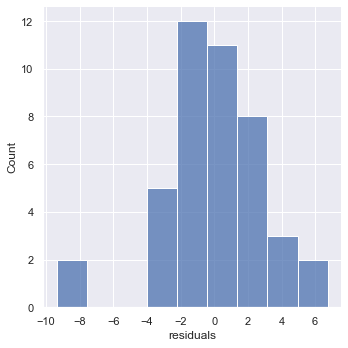

In [27]:
#plotting residuals frequency
sb.set(rc={'figure.figsize':(4,3)})
sb.displot(validation, x="residuals")

The residulas are pretty much normally distributed

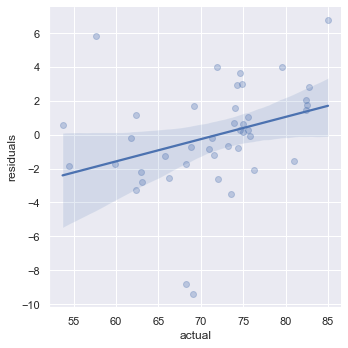

In [28]:
#checking correlation with actual values
sb.set(rc={'figure.figsize':(4,3)})
sb.lmplot(data=validation, x="actual", y="residuals", scatter_kws={'alpha':0.3})

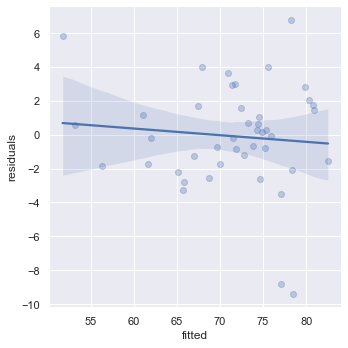

In [29]:
#checking correlation with fitted values
sb.set(rc={'figure.figsize':(4,3)})
sb.lmplot(data=validation, x="fitted", y="residuals", scatter_kws={'alpha':0.3})

We can see that all the residuals are scattered accross the plot. There are hardly any correlations with actual and fitted values

In [30]:
features_tuning.corr()

,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Adult Mortality,1.000000,0.159896,-0.075864,0.002386,-0.442376,0.194681,-0.185026,-0.176434,0.546924,-0.326583,0.002299,0.294207,0.301455,-0.619829,-0.516817
infant deaths,0.159896,1.000000,-0.061116,0.373773,-0.334562,0.995999,-0.142773,-0.107136,0.026696,-0.177416,0.139254,0.450759,0.462658,-0.307531,-0.376986
Hepatitis B,-0.075864,-0.061116,1.000000,0.090699,0.204779,-0.075801,0.468508,0.876507,-0.384497,0.070845,0.036784,-0.025139,-0.086823,0.242480,0.297197
Measles,0.002386,0.373773,0.090699,1.000000,-0.085363,0.359980,0.061597,0.077215,-0.062581,-0.079079,-0.058236,-0.053689,-0.068148,-0.010918,-0.010710
BMI,-0.442376,-0.334562,0.204779,-0.085363,1.000000,-0.361375,0.169426,0.205236,-0.348579,0.386133,0.033117,-0.638545,-0.648179,0.716039,0.670046
under-five deaths,0.194681,0.995999,-0.075801,0.359980,-0.361375,1.000000,-0.169655,-0.126064,0.055594,-0.190007,0.138502,0.456982,0.467668,-0.349727,-0.410765
Polio,-0.185026,-0.142773,0.468508,0.061597,0.169426,-0.169655,1.000000,0.548024,-0.254708,0.214944,-0.015095,-0.252131,-0.252603,0.427139,0.368228
Diphtheria,-0.176434,-0.107136,0.876507,0.077215,0.205236,-0.126064,0.548024,1.000000,-0.464463,0.195024,0.046048,-0.067024,-0.132146,0.367271,0.383071
HIV/AIDS,0.546924,0.026696,-0.384497,-0.062581,-0.348579,0.055594,-0.254708,-0.464463,1.000000,-0.193355,-0.066213,0.182425,0.162168,-0.477278,-0.416846
GDP,-0.326583,-0.177416,0.070845,-0.079079,0.386133,-0.190007,0.214944,0.195024,-0.193355,1.000000,0.174619,-0.308705,-0.307799,0.570007,0.585154


<AxesSubplot:>

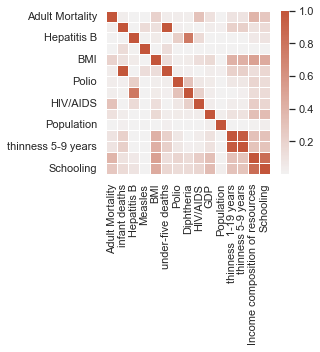

In [31]:
cmap = sb.diverging_palette(240, 20, as_cmap=True)

sb.heatmap(features_tuning.corr()**2, cmap=cmap, center=0, square=True, linewidths=.5)

We can see is multicollinearity of the variables. But since we are predicting it should be fine to use this model.

So, we can say that we now have a good pipeline that fits the data well on unseen data.

## Model interpretation 

In [32]:
# Standardising feature data
scaler = StandardScaler()
scaler.fit(features)
features_sc = scaler.transform(features)

# Polynomial features
pol = PolynomialFeatures(2)
pol.fit(features)
features_pol = pol.transform(features_sc)

# Standardising target data
scaler.fit(target)
target_sc = scaler.transform(target) 

# Training a OLS regression model
ols = LinearRegression()
ols.fit(features_pol, target_sc)

# Training a Lasso regression model, alpha is the tuned one
Lasso = Lasso(alpha=tunedAlpha, tol=1e-1)
Lasso.fit(features_pol, target_sc)

E:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Lasso(alpha=0.4328761281083057, tol=0.1)

In [33]:
betas = pd.DataFrame({"OLS_coef": ols.coef_.ravel(), "Lasso_coef": Lasso.coef_.ravel()})
betas.describe()

,OLS_coef,Lasso_coef
count,136.000000,136.000000
mean,-0.219664,0.002759
std,35.548065,0.035180
min,-138.248005,-0.038468
25%,-8.464795,-0.000000
50%,0.472678,0.000000
75%,11.873882,0.000000
max,118.917783,0.407910


From the difference betwween their β coefficients we can see that for OLS for most of it is far from 0. Then for Lasso we see that most of it are very close to 0.

Let's show how they are spread through a plot.

In [34]:
# empty vectors of beta coefficients
ols_coef = []
lasso_coef = []

# K-fold cross validation
for train_index, test_index in kf.split(features):
        
    # Splitting data into train-test
    features_train, features_test = features.iloc[train_index], features.iloc[test_index]
    target_train, target_test = target.iloc[train_index], target.iloc[test_index]
    
    pipe = Pipeline([('scaler', StandardScaler()), # scaling feature data
                     ('poly', PolynomialFeatures(2))]) # polynomial features

    # Standardising and polynomial features
    scaler = StandardScaler()
    pipe.fit(features_train)
    features_train = pipe.transform(features_train) 
    features_test = pipe.transform(features_test)
        
    # Standardising target data
    scaler.fit(target_train)
    target_train = scaler.transform(target_train) 
    target_test = scaler.transform(target_test)
    
    # Training both ols and lasso models
    lr_ols = LinearRegression()
    lr_lasso = Lasso
    
    lr_ols.fit(features_train, target_train)
    lr_lasso.fit(features_train, target_train)
    
    # Saving the corresponding beta coefficients
    ols_coef.append( lr_ols.coef_.ravel() )
    lasso_coef.append( lr_lasso.coef_.ravel() )

# Converting lists into NumPy arrays
ols_coef = np.array(ols_coef)
lasso_coef = np.array(lasso_coef)
    
# Reshaping the vectors so to have a matrix.  
# Each row corresponds to a fold, the number of columns is the feature space
nfolds = kf.get_n_splits(features)
ols_coef.shape = (nfolds, features_train.shape[1])
lasso_coef.shape = (nfolds, features_train.shape[1])

In [35]:
ols_coef.shape

(5, 136)

In [36]:
lasso_coef.shape

(5, 136)

<AxesSubplot:xlabel='beta', ylabel='value'>

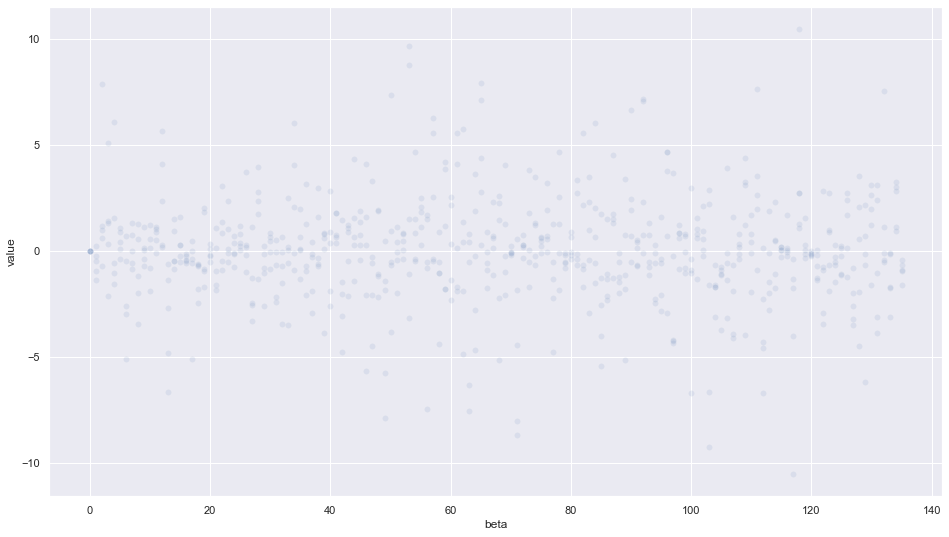

In [37]:
#plotting the coefficients for OLS
df = pd.DataFrame(ols_coef.T)
df["beta"] = range(0, ols_coef.shape[1])
dfm = pd.melt(df, id_vars=['beta'])

sb.set(rc={'figure.figsize':(16,9)})
sb.scatterplot(data = dfm, x="beta", y="value", alpha=.1)

<AxesSubplot:xlabel='beta', ylabel='value'>

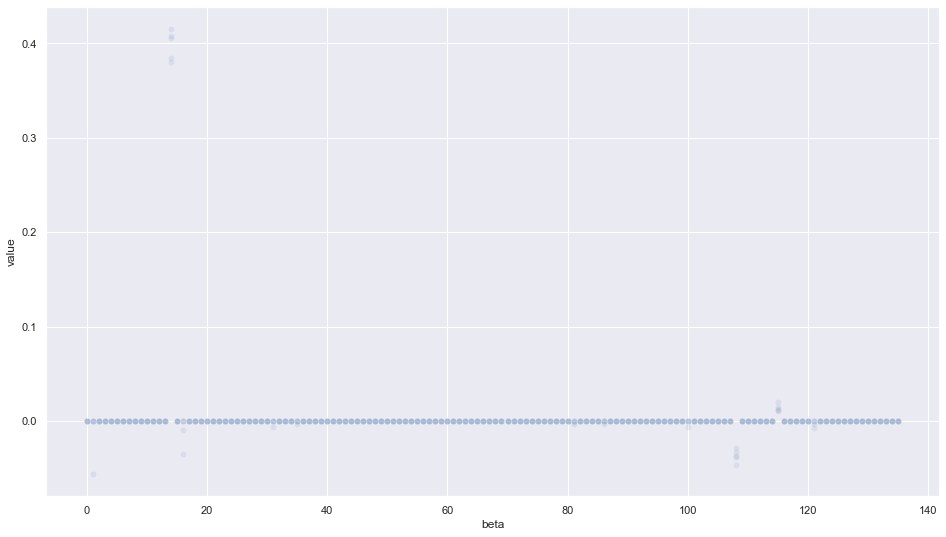

In [38]:
#Plotting the coefficients for Lasso
df = pd.DataFrame(lasso_coef.T)
df["beta"] = range(0, lasso_coef.shape[1])
dfm = pd.melt(df, id_vars=['beta'])

sb.set(rc={'figure.figsize':(16,9)})
sb.scatterplot(data = dfm, x="beta", y="value", alpha=.1)

We can see that many β coefficients are equal to zero when Lasso regression is used. Since Lasso is good for dimensionality reduction. We can clearly see that here.

## Pros/cons and time complexity of the designed pipeline

The time complexity for training a Lasso regression model is  O(n^2 *m), where:

n  is the number of observations (rows of our data);
m  is the number of elements (columns of our data).

The most time-consuming part is tuning, the simple algorithm for which is:

for each alpha to tune:
    for each fold k:
        splitting data into train-test
        standardising data
        train Lasso
        test Lasso
    compute average accuracy
choose the best tuned alpha
The total time-complexity of such algorithm is therefore  O(a*k*n^2 *m), where:

a  is the number if  α  parameters to test;
k  is the number of folds in the k-fold cross validations.

Lasso provides a model with high prediction accuracy. This increase in accuracy happens because for this method we shrink the coeddicients, which reduces the variance and minimizes the bias. It performs best when the number of observations is low and the number of features is high.

The disadvantage of Lasso is it mainly emphasizes on the accuracy of the model. It is complex in interpretabilty. It does an automatic regression with many things not considering into the model. So, a lot of times it makes less sense and it also ignores some nonsignificant variables.Lasso also can not do group selection. So, for models which need group selection Lasso can not be the option for model choosing.